# Imports

In [3]:
import pandas as pd
import numpy as np
import os
import gc
import sys 

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from utils import clean_database, perform_voting_feature_selection, perform_transformation_feature_selection, perform_voting_feature_transformation, compare_feature_transformation_methods
pd.set_option('display.max_columns', None)

preprocessing_dir = os.path.join('figures','preprocessing', 'RF2')
db_path = os.path.join('..', 'data', 'datasets', '5G NIDD', 'Combined.csv')

# Data cleaning and splitting

[Preprocessing] Dropping artifact columns: ['Unnamed: 0']
Original shape: (1215890, 51)
Shape after removing duplicates: (1215869, 51)

[Dataset Info] Attack Type Distribution (Counts):
Attack Type
Benign            477716
UDPFlood          457340
HTTPFlood         140812
SlowrateDoS        73124
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: count, dtype: int64
[Preprocessing] Final feature set (40): ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']

[Verification] Class distribution (normalized) across splits:
                Original     Train       Val      Test
Attac

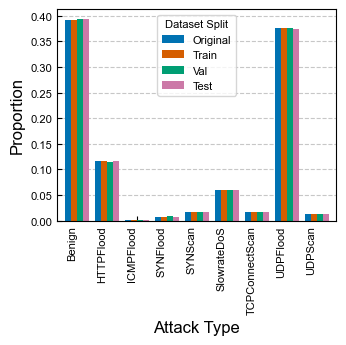

[Preprocessing] Applying standard scaling...
<class 'pandas.core.frame.DataFrame'>
Index: 972695 entries, 285273 to 583254
Data columns (total 40 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dur         972695 non-null  float32
 1   Mean        972695 non-null  float32
 2   Sum         972695 non-null  float32
 3   Min         972695 non-null  float32
 4   Max         972695 non-null  float32
 5   Proto       972695 non-null  float32
 6   sTos        972695 non-null  float32
 7   dTos        972695 non-null  float32
 8   sDSb        972695 non-null  float32
 9   dDSb        972695 non-null  float32
 10  sTtl        972695 non-null  float32
 11  dTtl        972695 non-null  float32
 12  Cause       972695 non-null  float32
 13  TotPkts     972695 non-null  float32
 14  SrcPkts     972695 non-null  float32
 15  DstPkts     972695 non-null  float32
 16  TotBytes    972695 non-null  float32
 17  SrcBytes    972695 non-null  float32
 18 

5687

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, output_encoder = clean_database(db_path, preprocessing_dir, do_scale=True, fix_skewness=False)
gc.collect()


In [5]:
# Print the number of remaining features
print(f"Remaining features count: {X_train.shape[1]}")

# Print the list of remaining feature names
print("Remaining features list:")
print(X_train.columns.tolist())

Remaining features count: 40
Remaining features list:
['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat']


# Arguments

In [6]:
n_features_list = [35, 30, 25, 20, 15, 10, 5, 1]

# Feature selection methods loop


STARTING PIPELINE: 35 FEATURES
[Setup] Directory exists: ../data frames/main/RF2/35 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 35 features...
[Filter] Completed in 0.13 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'SrcLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'TcpRtt', 'SynAck', 'AckDat']
   -> Validation Accuracy: 0.9789

--- Filter Method: anova ---

[Filter] Starting ANOVA Feature Selection to select top 35 features...
[Filter] Completed in 0.15 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max',

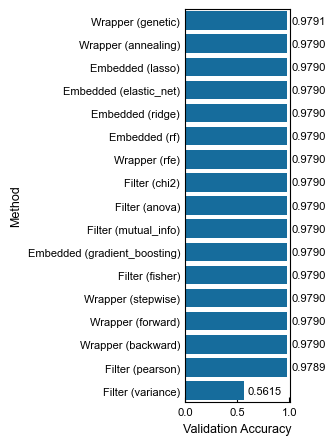


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (genetic)']
Winner: Wrapper (genetic)
Selected Features (9): ['Max', 'sTtl', 'TotBytes', 'DstBytes', 'Offset', 'DstLoss', 'State', 'TcpRtt', 'AckDat']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/35 features (Skipping Sampling)...
COMPLETED: 35 features pipeline finished.


STARTING PIPELINE: 30 FEATURES
[Setup] Created directory: ../data frames/main/RF2/30 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 30 features...
[Filter] Completed in 0.14 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPk

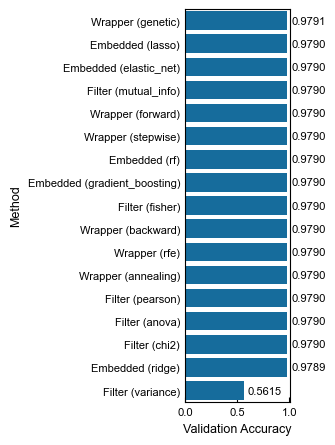


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (genetic)']
Winner: Wrapper (genetic)
Selected Features (9): ['Max', 'sTtl', 'TotBytes', 'DstBytes', 'Offset', 'DstLoss', 'State', 'TcpRtt', 'AckDat']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/30 features (Skipping Sampling)...
COMPLETED: 30 features pipeline finished.


STARTING PIPELINE: 25 FEATURES
[Setup] Created directory: ../data frames/main/RF2/25 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 25 features...
[Filter] Completed in 0.17 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'sTos', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes',

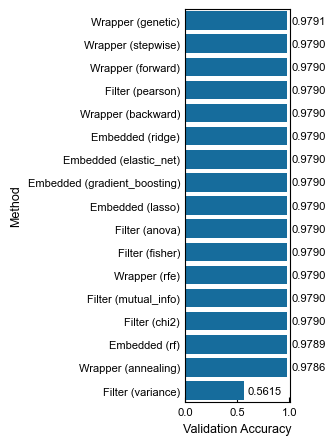


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (genetic)']
Winner: Wrapper (genetic)
Selected Features (9): ['Max', 'sTtl', 'TotBytes', 'DstBytes', 'Offset', 'DstLoss', 'State', 'TcpRtt', 'AckDat']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/25 features (Skipping Sampling)...
COMPLETED: 25 features pipeline finished.


STARTING PIPELINE: 20 FEATURES
[Setup] Created directory: ../data frames/main/RF2/20 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 20 features...
[Filter] Completed in 0.16 seconds.
[Filter] Selected Features: ['Dur', 'Mean', 'Sum', 'Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'dTtl', 'Cause', 'TotPkts', 'SrcPkts', 'TotBytes', 'SrcBytes', 'Offse

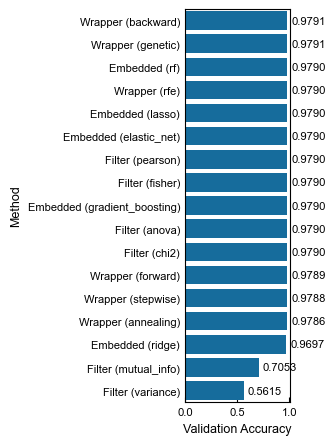


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (backward)']
Winner: Wrapper (backward)
Selected Features (20): ['Max', 'dTos', 'sDSb', 'sTtl', 'dTtl', 'Cause', 'DstPkts', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'DstLoad', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'State', 'SrcWin', 'TcpRtt']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/20 features (Skipping Sampling)...
COMPLETED: 20 features pipeline finished.


STARTING PIPELINE: 15 FEATURES
[Setup] Created directory: ../data frames/main/RF2/15 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 15 features...
[Filter] Completed in 0.15 seconds.
[Filter] Selected Features: ['Dur', 'Mean', '

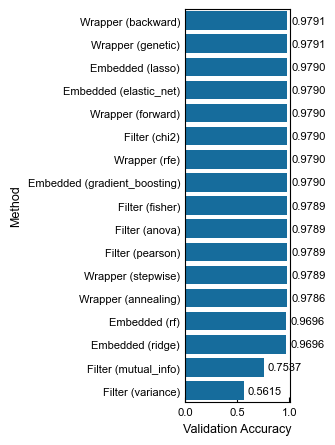


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (backward)']
Winner: Wrapper (backward)
Selected Features (15): ['Max', 'dTos', 'sDSb', 'sTtl', 'dTtl', 'TotBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'DstLoad', 'SrcLoss', 'DstLoss', 'State', 'SrcWin', 'TcpRtt']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/15 features (Skipping Sampling)...
COMPLETED: 15 features pipeline finished.


STARTING PIPELINE: 10 FEATURES
[Setup] Created directory: ../data frames/main/RF2/10 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 10 features...
[Filter] Completed in 0.15 seconds.
[Filter] Selected Features: ['Min', 'Max', 'Proto', 'dDSb', 'sTtl', 'Offset', 'sMeanPktSz', 'd

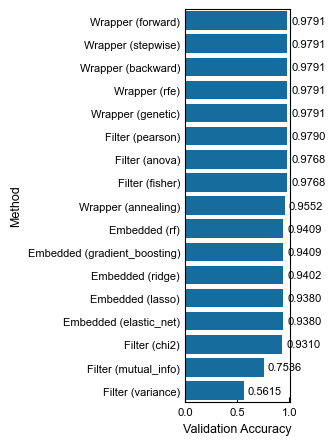


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9791
Candidates with top accuracy: ['Wrapper (forward)', 'Wrapper (stepwise)']
Tie detected. Selecting method with lowest execution time...
Winner: Wrapper (stepwise) (Time: 90.5463s)
Selected Features (10): ['Dur', 'sDSb', 'sTtl', 'DstPkts', 'TotBytes', 'Offset', 'sMeanPktSz', 'State', 'SrcWin', 'TcpRtt']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/10 features (Skipping Sampling)...
COMPLETED: 10 features pipeline finished.


STARTING PIPELINE: 5 FEATURES
[Setup] Created directory: ../data frames/main/RF2/5 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 5 features...
[Filter] Completed in 0.17 seconds.
[Filter] Selected Features: ['Proto', 'dDSb', 'sTt

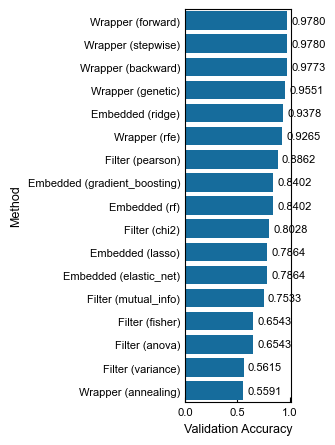


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.9780
Candidates with top accuracy: ['Wrapper (forward)', 'Wrapper (stepwise)']
Tie detected. Selecting method with lowest execution time...
Winner: Wrapper (stepwise) (Time: 39.9826s)
Selected Features (5): ['Dur', 'sTtl', 'TotBytes', 'Offset', 'State']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/5 features (Skipping Sampling)...
COMPLETED: 5 features pipeline finished.


STARTING PIPELINE: 1 FEATURES
[Setup] Created directory: ../data frames/main/RF2/1 features
[Step 1] Running Voting Feature Selection...

[Comparison] Using full training data (972695 samples) for feature selection.

Comparing Feature Selection Methods

--- Filter Method: pearson ---

[Filter] Starting PEARSON Feature Selection to select top 1 features...
[Filter] Completed in 0.08 seconds.
[Filter] Selected Features: ['sTtl']
   -> Validation Accuracy: 0.5532

--- Filter Method: anova ---

[Fil

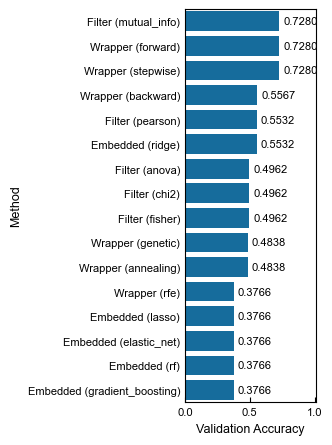


Selecting Best Feature Selection Method
Highest Validation Accuracy: 0.7280
Candidates with top accuracy: ['Filter (mutual_info)', 'Wrapper (forward)', 'Wrapper (stepwise)']
Tie detected. Selecting method with lowest execution time...
Winner: Wrapper (stepwise) (Time: 5.1918s)
Selected Features (1): ['TotBytes']
[Step 2] Dropping non-selected features...
[Step 3] Saving dataframes to ../data frames/main/RF2/1 features (Skipping Sampling)...
COMPLETED: 1 features pipeline finished.



In [7]:
# Helper to save DataFrame or Numpy array to CSV
def save_to_csv(data, full_path):
    if isinstance(data, pd.DataFrame):
        data.to_csv(full_path, index=False)
    else:
        # Convert numpy array to DataFrame
        pd.DataFrame(data).to_csv(full_path, index=False)
        
# 1. Loop through each configuration
for n in n_features_list:
    print(f"\n{'='*80}")
    print(f"STARTING PIPELINE: {n} FEATURES")
    print(f"{'='*80}")
    
    # --- A. Setup Version and Directory ---
    version = f"{n}F"
    save_dir = os.path.join('..', 'data frames', 'main', 'RF2', f'{n} features')
    
    # Create the directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        print(f"[Setup] Created directory: {save_dir}")
    else:
        print(f"[Setup] Directory exists: {save_dir}")

    # --- B. Perform Feature Selection ---
    # We pass the ORIGINAL full datasets (X_train, etc.)
    print(f"[Step 1] Running Voting Feature Selection...")
    selected_features, comparison_results = perform_voting_feature_selection(
        X_train, y_train, X_val, y_val, 
        n_features=n, 
        sample_size=None, 
        file_path=preprocessing_dir, # Keeps selection plots in the main preprocessing folder
        version=version
    )
    
    # Save the list of selected features to a text file
    with open(os.path.join(save_dir, f'selected_features_{version}.txt'), 'w') as f:
        f.write('\n'.join(selected_features))

    # --- C. Subset the Data ---
    # CRITICAL: We create COPIES (sub) instead of overwriting X_train.
    # This preserves the original X_train for the next iteration of the loop.
    print(f"[Step 2] Dropping non-selected features...")
    X_train_sub = X_train[selected_features].copy()
    X_val_sub = X_val[selected_features].copy()
    X_test_sub = X_test[selected_features].copy()

    # --- D. Save the Dataframes (Skipping Preprocessing/Sampling) ---
    print(f"[Step 3] Saving dataframes to {save_dir} (Skipping Sampling)...")
    
    save_to_csv(X_train_sub, os.path.join(save_dir, f'X_train_{version}.csv'))
    save_to_csv(X_val_sub, os.path.join(save_dir, f'X_val_{version}.csv'))
    save_to_csv(X_test_sub, os.path.join(save_dir, f'X_test_{version}.csv'))
    save_to_csv(y_train, os.path.join(save_dir, f'y_train_{version}.csv'))
    save_to_csv(y_val, os.path.join(save_dir, f'y_val_{version}.csv'))
    save_to_csv(y_test, os.path.join(save_dir, f'y_test_{version}.csv'))

    # --- F. Save Label Classes ---
    # Saving the classes is crucial for decoding predictions later
    np.save(os.path.join(save_dir, f'label_classes_{version}.npy'), output_encoder.classes_)
    
    print(f"COMPLETED: {n} features pipeline finished.\n")



STARTING FEATURE TRANSFORMATION SELECTION

[Comparison] Using full training data (972695 samples) for feature transformation.

Comparing Feature Transformation Methods

--- Transformation Method: pca (n_components=0.99) ---

[Transformation] Starting PCA to reduce to 0.99 components...
[Transformation] Completed in 0.09 seconds.
PCA explained variance ratio: [0.18780045 0.13450696 0.10083082 0.0896275  0.07486732 0.06231275
 0.05611769 0.04612374 0.03347405 0.03094458 0.02460591 0.02456441
 0.02449876 0.02324843 0.01754357 0.01294507 0.01037524 0.00956176
 0.00857031 0.00708114 0.00520439 0.00400691 0.00336253]
PCA explained variance (cumulative): [0.18780045 0.3223074  0.42313823 0.51276577 0.5876331  0.64994586
 0.70606357 0.7521873  0.78566134 0.8166059  0.84121186 0.86577624
 0.890275   0.91352344 0.931067   0.94401205 0.9543873  0.9639491
 0.9725194  0.97960055 0.9848049  0.98881185 0.9921744 ]
   -> Validation Accuracy: 0.9789

--- Transformation Method: pca (n_components=0.95) 

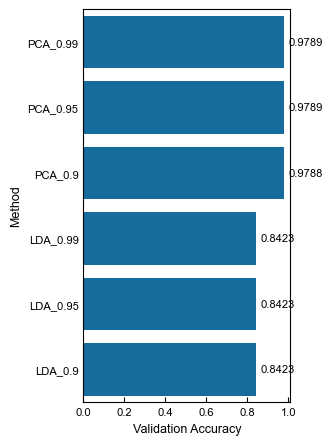


Selecting Best Feature Transformation Method
Highest Validation Accuracy: 0.9789
Candidates with top accuracy: ['PCA_0.99']
Winner: PCA_0.99

[Result] Best Transformation: PCA with n_components=0.99

[Transformation] Starting PCA to reduce to 0.99 components...
[Transformation] Completed in 0.08 seconds.
PCA explained variance ratio: [0.18780045 0.13450696 0.10083082 0.0896275  0.07486732 0.06231275
 0.05611769 0.04612374 0.03347405 0.03094458 0.02460591 0.02456441
 0.02449876 0.02324843 0.01754357 0.01294507 0.01037524 0.00956176
 0.00857031 0.00708114 0.00520439 0.00400691 0.00336253]
PCA explained variance (cumulative): [0.18780045 0.3223074  0.42313823 0.51276577 0.5876331  0.64994586
 0.70606357 0.7521873  0.78566134 0.8166059  0.84121186 0.86577624
 0.890275   0.91352344 0.931067   0.94401205 0.9543873  0.9639491
 0.9725194  0.97960055 0.9848049  0.98881185 0.9921744 ]
[Setup] Created directory: ../data frames/main/RF2/PCA_0.99
[Step 3] Saving best transformed dataframes to ../d

In [8]:
# --- Transformation Methods ---
# We use the voting function to compare PCA/LDA with different components
# and automatically select the best one based on validation accuracy.

print(f"\n{'='*80}")
print(f"STARTING FEATURE TRANSFORMATION SELECTION")
print(f"{'='*80}")

# 1. Run Voting for Transformation Methods
# This will compare PCA and LDA with 0.99, 0.95, and 0.90 variance/components
best_transformation, transformation_results = perform_voting_feature_transformation(
    X_train, y_train, X_val, y_val,
    n_components_options=[0.99, 0.95, 0.90],
    sample_size=None,
    file_path=preprocessing_dir,
    version="transformation_comparison"
)

if best_transformation:
    best_method = best_transformation['method']
    best_n_comp = best_transformation['n_components']
    
    print(f"\n[Result] Best Transformation: {best_method.upper()} with n_components={best_n_comp}")
    
    # 2. Apply the Best Transformation to all datasets
    # We need to re-run the transformation with the best parameters to get the final datasets
    # Note: We pass X_test to get it transformed as well
    X_train_trans, X_val_trans, X_test_trans, exec_time = perform_transformation_feature_selection(
        X_train, y_train, X_train, X_val, X_test, # Fit on X_train
        n_components=best_n_comp, 
        method=best_method
    )
    
    # 3. Setup Directory for the best transformation
    version = f"{best_method.upper()}_{best_n_comp}"
    save_dir = os.path.join('..', 'data frames', 'main', 'RF2', version)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        print(f"[Setup] Created directory: {save_dir}")
        
    # 4. Save Transformed Dataframes
    print(f"[Step 3] Saving best transformed dataframes to {save_dir}...")
    save_to_csv(X_train_trans, os.path.join(save_dir, f'X_train_{version}.csv'))
    save_to_csv(X_val_trans, os.path.join(save_dir, f'X_val_{version}.csv'))
    save_to_csv(X_test_trans, os.path.join(save_dir, f'X_test_{version}.csv'))
    
    # Save targets (unchanged)
    save_to_csv(y_train, os.path.join(save_dir, f'y_train_{version}.csv'))
    save_to_csv(y_val, os.path.join(save_dir, f'y_val_{version}.csv'))
    save_to_csv(y_test, os.path.join(save_dir, f'y_test_{version}.csv'))
    
    # Save Label Classes
    np.save(os.path.join(save_dir, f'label_classes_{version}.npy'), output_encoder.classes_)
    
    print(f"COMPLETED: Best transformation pipeline finished.\n")
else:
    print("No suitable transformation method found.")
